## Question 1:

#### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [11]:
# import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load dataset
df = pd.read_csv('/Users/chinmayee/Downloads/Data_Science_Intern_Challenge.csv')

In [4]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [8]:
# data summary
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [41]:
# To understand average order amount for each shop
mean_per_shop = df.groupby('shop_id')['order_amount'].mean().reset_index()
mean_per_shop

,shop_id,order_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

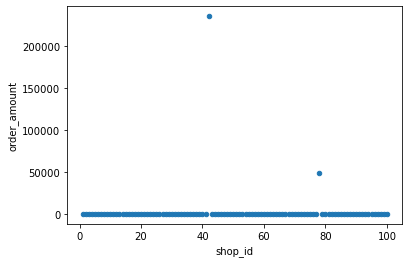

In [42]:
# plot to show outlier
mean_per_shop.plot(kind="scatter",x="shop_id",y="order_amount")

In [43]:
# finding shops with the abruptly high order amounts based on the plot above
mean_per_shop.sort_values(["order_amount"], ascending=False)

,shop_id,order_amount
41,42,235101.490196
77,78,49213.043478
49,50,403.545455
89,90,403.224490
37,38,390.857143
...,...,...
52,53,214.117647
99,100,213.675000
31,32,189.976190
1,2,174.327273


#### Answer: 
We can observe from the scatter plot above that the two shops 42 and 78 hav abruptly large order amounts. This is the reason why naive calculation of AOV turns out to be $3145.13.
The better way to evaluate this data would be to calculate AOV by considering a metric that will measure shop's performance well.

### b) What metric would you report for this dataset?

As seen above it is clear that shop with id's 42 and 78 are outliers which affects the AOV.
Suggested Metrics:
1. Consider median of order_amount as it does not get affected by the outliers unlike mean value.
2. Drop the two outling shops i.e., 42 and 78. Then calculate the AOV for the rest of the data.
3. Use trimmed mean approach. In this case the data will removed from both higher and lower ends.

In [44]:
# First Approach
df["order_amount"].median()

284.0

In [45]:
# Second Approach
new_df = df[(df.shop_id != 42) & (df.shop_id != 78)]

In [46]:
metric_value = new_df["order_amount"].mean()
round(metric_value,3)

300.156

### c) What is its value?

I've selected to use the second approach described above as my final metric. <br>
Value of the metric is : 300.156

## Question 2: SQL

### a) How many orders were shipped by Speedy Express in total?<br>
#### Answer: 54 orders shipped by Speedy Express

SELECT count(distinct o.orderid) as total_orders_shipped <br>
FROM orders o inner join shippers s on o.shipperid = s.shipperid <br>
where s.shippername = 'Speedy Express'

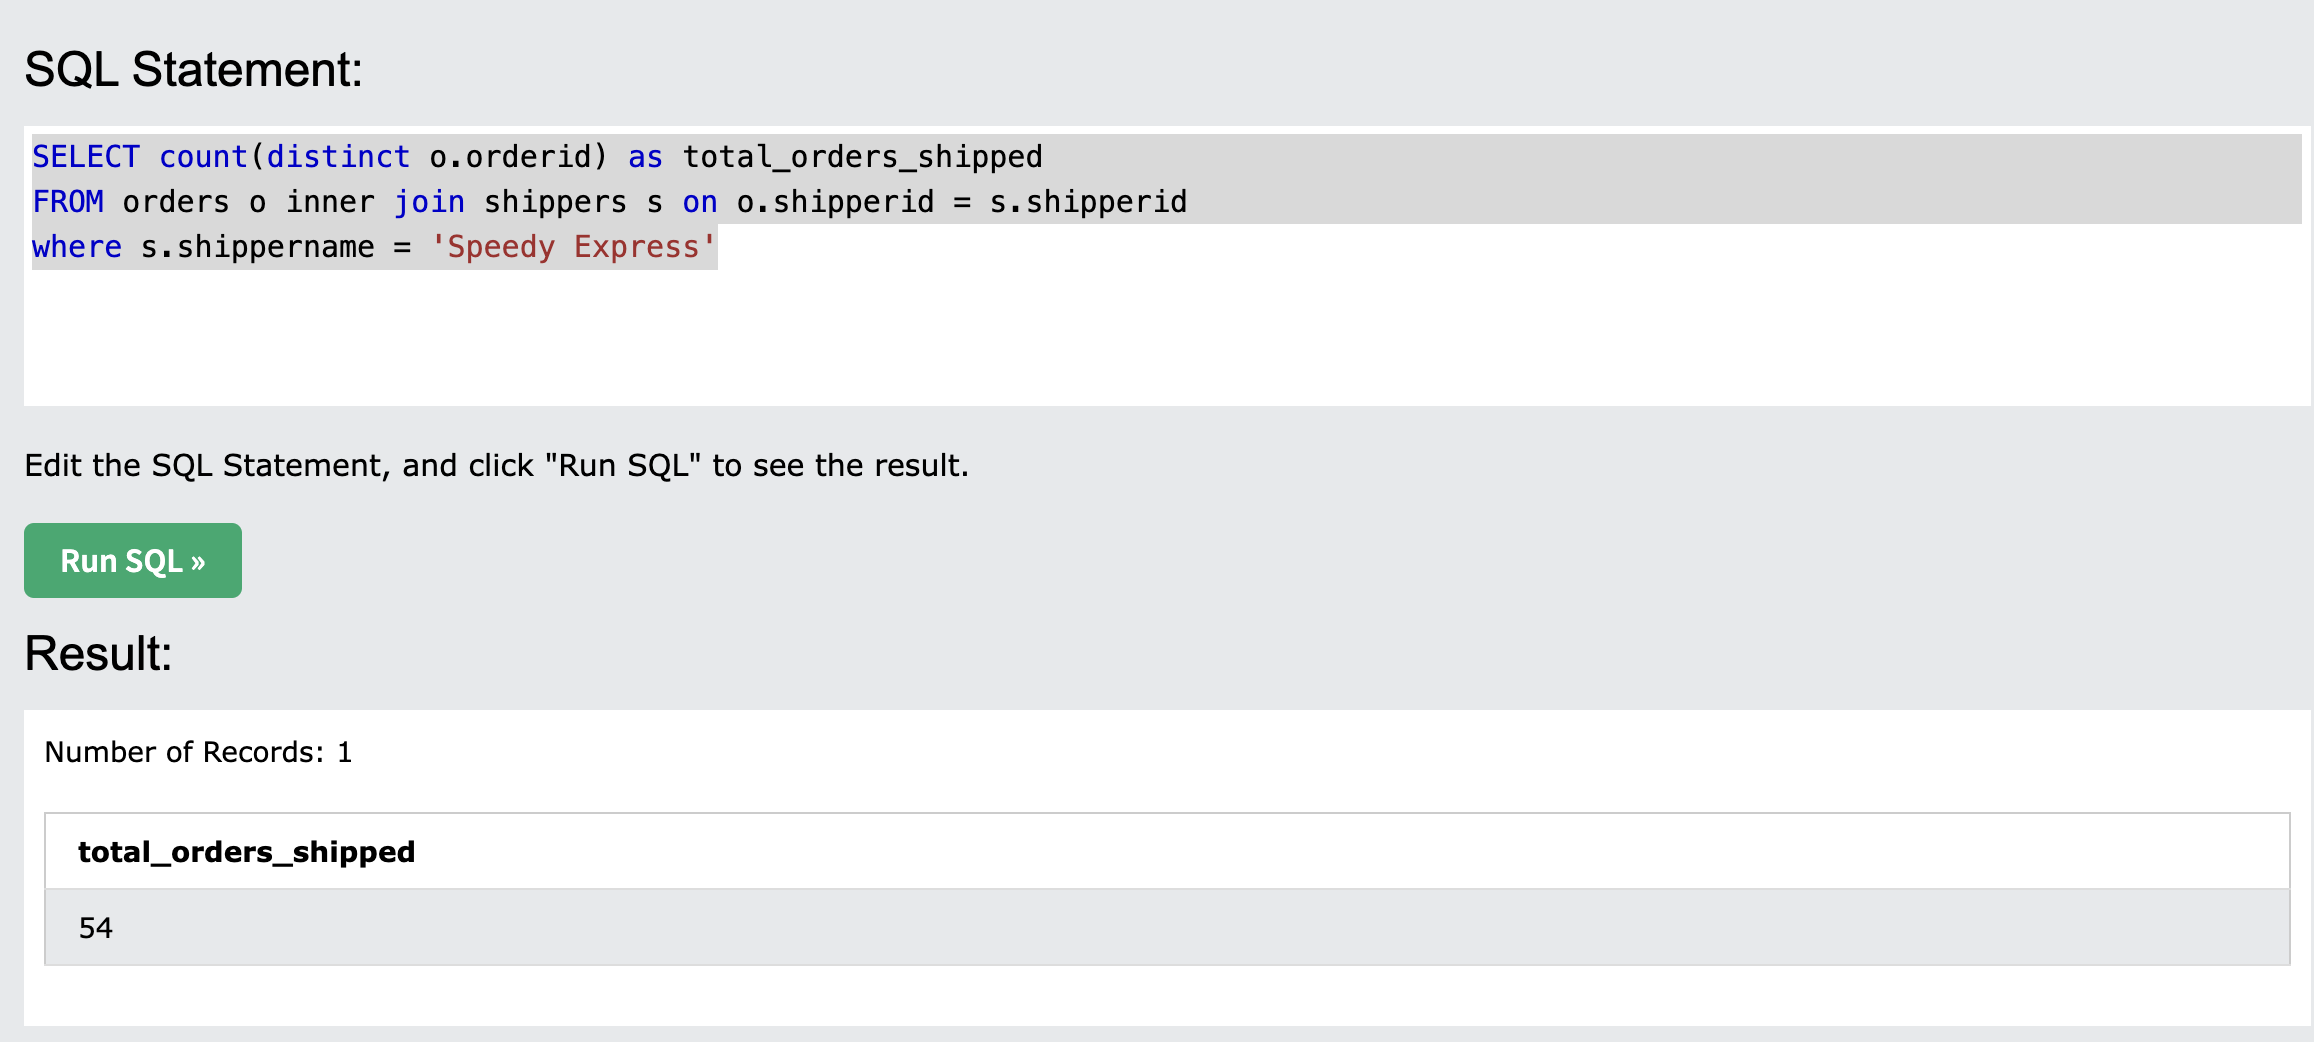

### b) What is the last name of the employee with the most orders? <br>
#### Answer:  Employee with last name Peacock with 40 orders

SELECT e.lastname, count(o.orderid) as most_orders <br>
FROM orders o inner join employees e on o.employeeid = e.employeeid <br>
group by (e.employeeid) <br>
order by most_orders desc <br>
limit 1

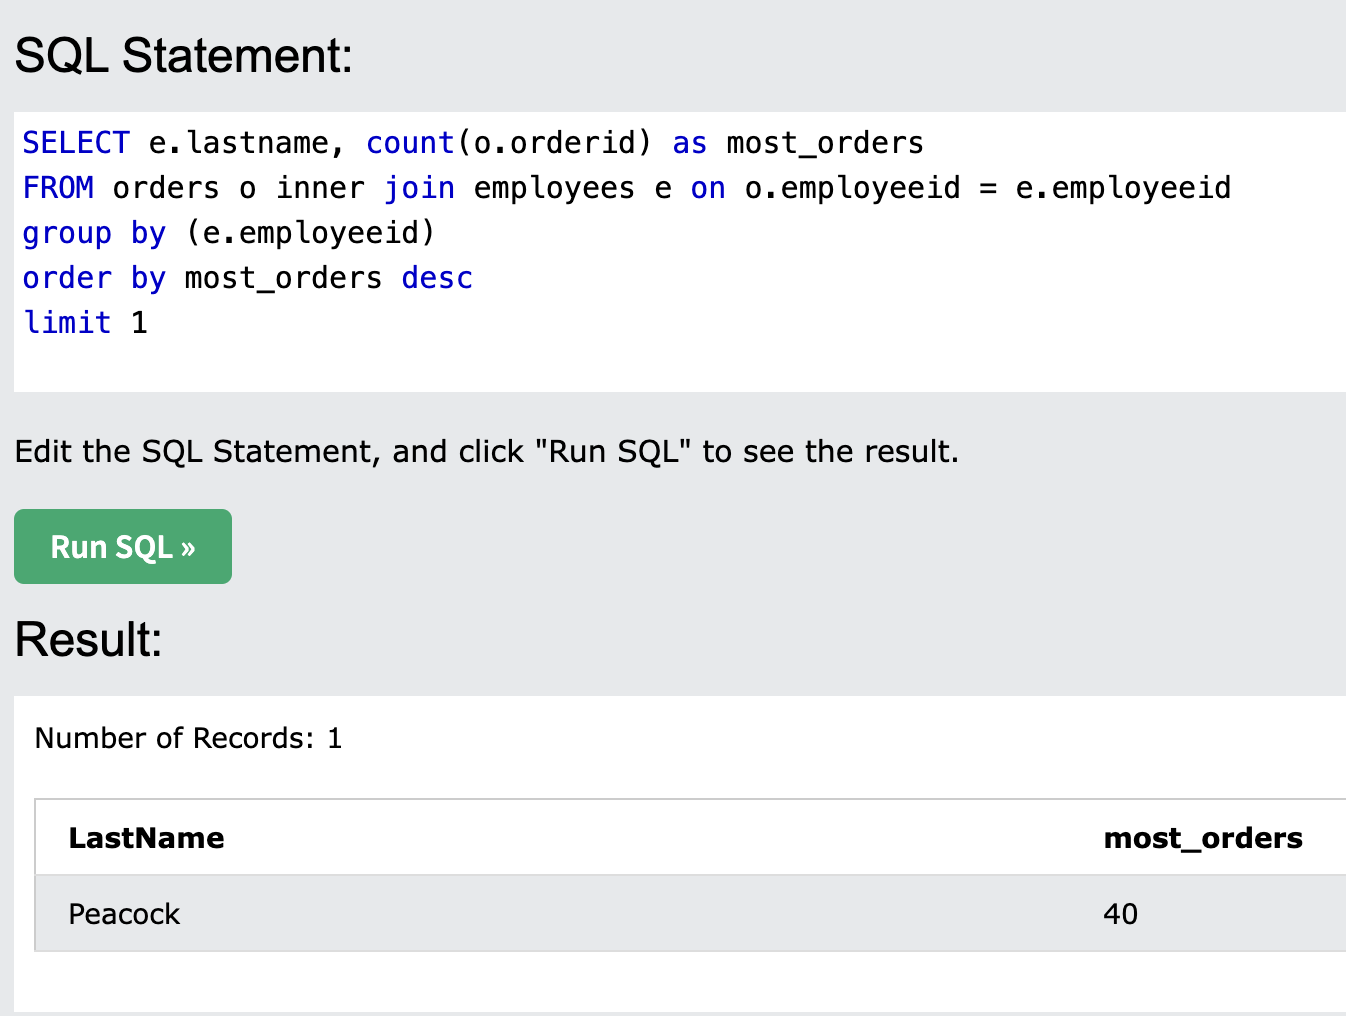

### c) What product was ordered the most by customers in Germany? <br>
#### Answer:  Boston Crab Meat : 160 order quantity

SELECT p.productname, sum(od.quantity) as total <br>
FROM Products p inner join orderdetails od on p.productid = od.productid  <br>
inner join orders o on o.orderid = od.orderid  <br>
inner join customers c on c.customerid = o.customerid <br>
where c.country = 'Germany' <br>
group by p.productname <br>
order by total desc <br>
limit 1


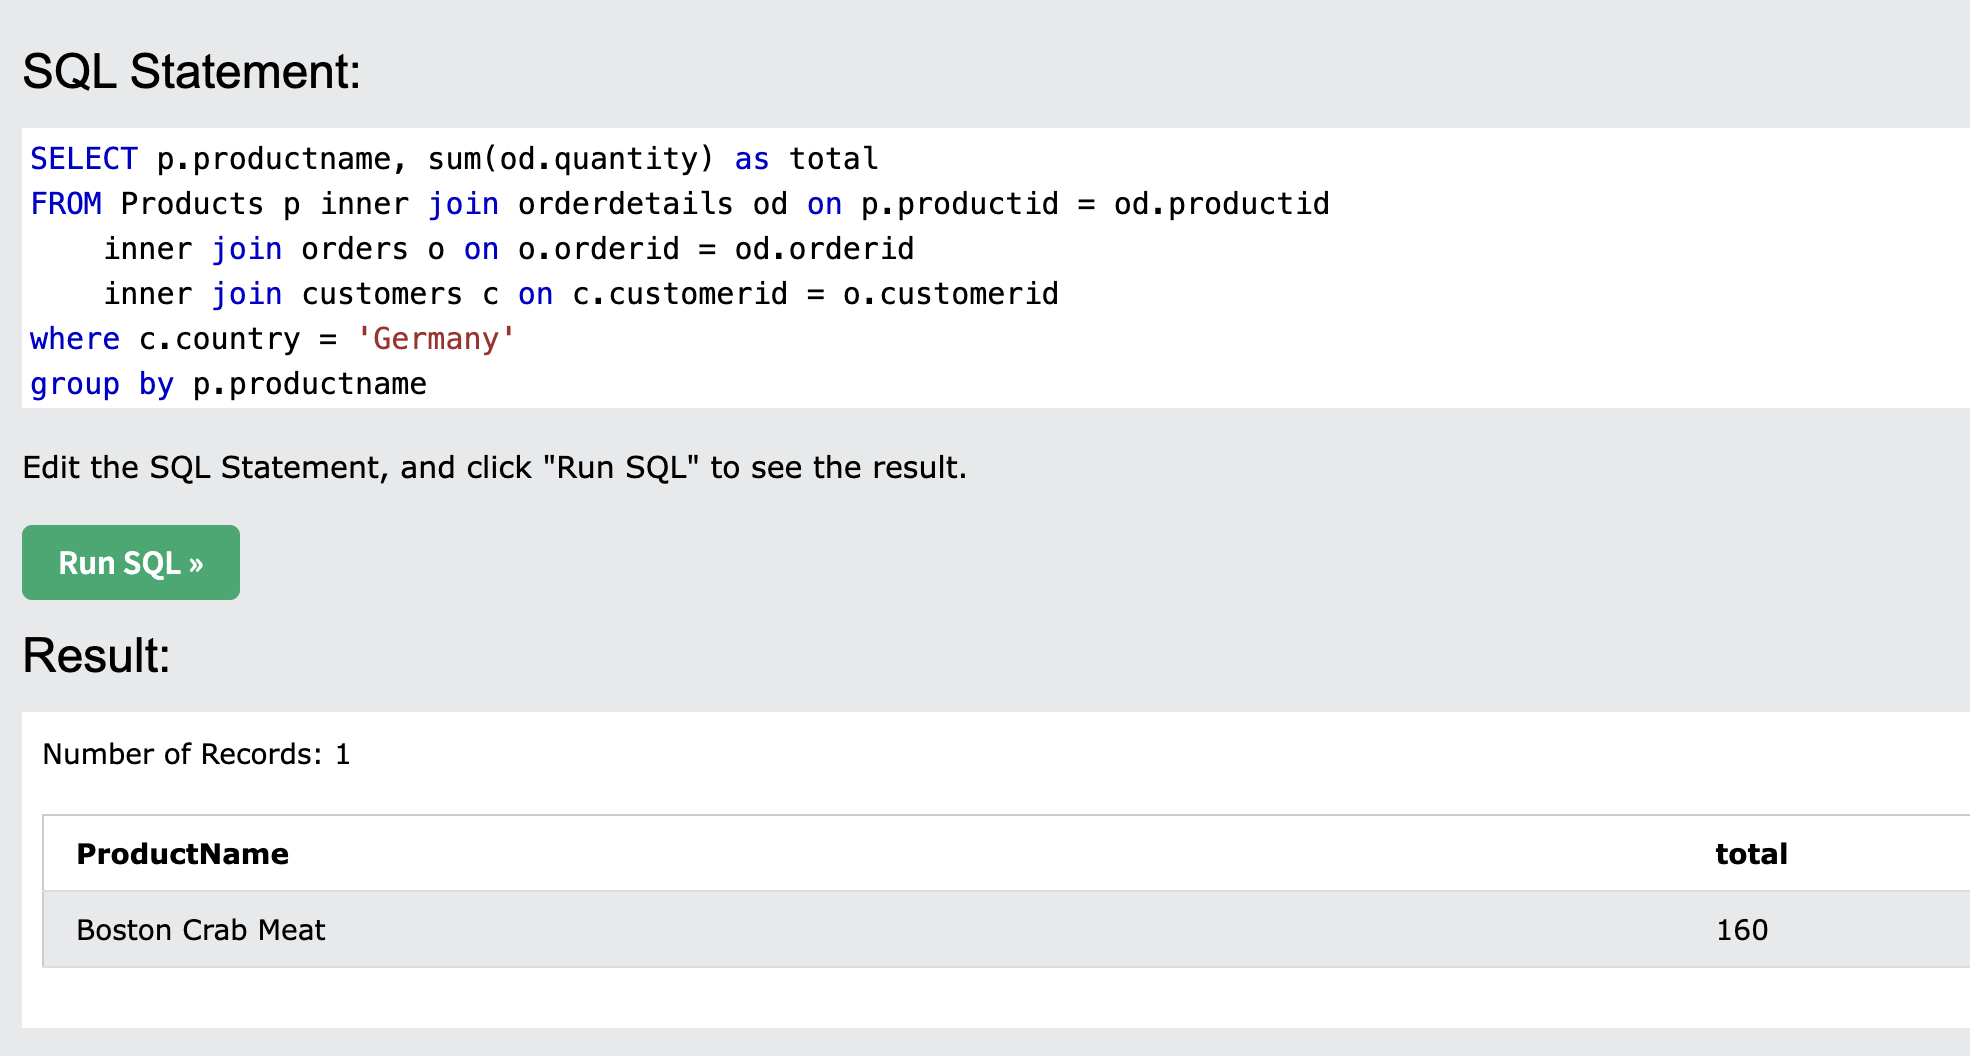